<a href="https://colab.research.google.com/github/ashutosh1608/mnist_ocr/blob/master/av_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
! unzip "/content/drive/My Drive/MNIST/train_proc.zip"

Streaming output truncated to the last 5000 lines.
  inflating: train_proc/55.png       
  inflating: train_proc/550.png      
  inflating: train_proc/5500.png     
  inflating: train_proc/5501.png     
  inflating: train_proc/5502.png     
  inflating: train_proc/5503.png     
  inflating: train_proc/5504.png     
  inflating: train_proc/5505.png     
  inflating: train_proc/5506.png     
  inflating: train_proc/5507.png     
  inflating: train_proc/5508.png     
  inflating: train_proc/5509.png     
  inflating: train_proc/551.png      
  inflating: train_proc/5510.png     
 extracting: train_proc/5511.png     
  inflating: train_proc/5512.png     
  inflating: train_proc/5513.png     
  inflating: train_proc/5514.png     
  inflating: train_proc/5515.png     
  inflating: train_proc/5516.png     
  inflating: train_proc/5517.png     
  inflating: train_proc/5518.png     
  inflating: train_proc/5519.png     
  inflating: train_proc/552.png      
  inflating: train_proc/5520.png     

In [ ]:
! unzip "/content/drive/My Drive/MNIST/test_proc.zip"

Streaming output truncated to the last 5000 lines.
  inflating: test_proc/65001.png     
  inflating: test_proc/65002.png     
  inflating: test_proc/65003.png     
  inflating: test_proc/65004.png     
  inflating: test_proc/65005.png     
  inflating: test_proc/65006.png     
  inflating: test_proc/65007.png     
  inflating: test_proc/65008.png     
  inflating: test_proc/65009.png     
  inflating: test_proc/65010.png     
  inflating: test_proc/65011.png     
  inflating: test_proc/65012.png     
  inflating: test_proc/65013.png     
  inflating: test_proc/65014.png     
  inflating: test_proc/65015.png     
  inflating: test_proc/65016.png     
  inflating: test_proc/65017.png     
  inflating: test_proc/65018.png     
  inflating: test_proc/65019.png     
 extracting: test_proc/65020.png     
  inflating: test_proc/65021.png     
  inflating: test_proc/65022.png     
  inflating: test_proc/65023.png     
  inflating: test_proc/65024.png     
  inflating: test_proc/65025.png     

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import image
from matplotlib import pyplot as plt

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten, ZeroPadding2D, Flatten, Dropout
from keras.models import Model, load_model
from keras.applications import VGG16, InceptionResNetV2, inception_resnet_v2, MobileNet
#from keras.applications.InceptionResNetV2 import preprocess_input
from keras.models import Sequential
from keras.initializers import glorot_uniform
from keras.regularizers import l2
from keras.optimizers import SGD, Adam
import keras

Using TensorFlow backend.


In [ ]:
train=pd.read_csv("/content/drive/My Drive/MNIST/train.csv")
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [ ]:
test=pd.read_csv("/content/drive/My Drive/MNIST/test.csv")
test.head()

,filename
0,49000.png
1,49001.png
2,49002.png
3,49003.png
4,49004.png


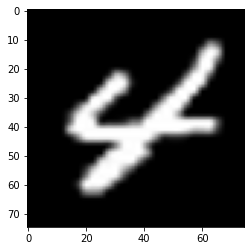

In [ ]:
im=image.imread("/content/train_proc/0.png")
plt.imshow(im)

In [ ]:
im.shape

(75, 75, 4)

In [ ]:
train_x=[]
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for l in train["filename"]:
    img=image.imread("/content/train_proc/"+str(l))
    img=img[:, :, :3]
    for c in range(img.shape[2]):
        img[:, :, c]=ss.fit_transform(img[:, :, c])
    train_x.append(img)

In [ ]:
test_x=[]
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for l in test["filename"]:
    img=image.imread("/content/test_proc/"+str(l))
    img=img[:, :, :3]
    for c in range(img.shape[2]):
        img[:, :, c]=ss.fit_transform(img[:, :, c])
    test_x.append(img)

In [ ]:
train_x=np.array(train_x)
train_x.shape

(49000, 75, 75, 3)

In [ ]:
test_x=np.array(test_x)
test_x.shape

(21000, 75, 75, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


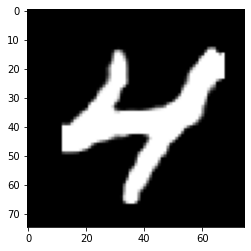

In [ ]:
plt.imshow(test_x[0])

In [ ]:
train_y=np.array(train["label"])

In [ ]:
train_y=train_y.reshape(train_y.shape[0], 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6]


(<matplotlib.image.AxesImage at 0x7fb1d8a4c0f0>, None)

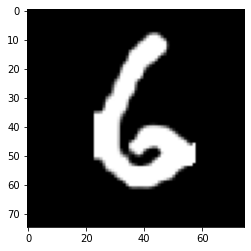

In [ ]:
plt.imshow(train_x[9650]), print(train_y[9650])

In [ ]:
train_y=np.float32(train_y)

In [ ]:
def one_hot(train_y, c):
    l=np.zeros((len(train_y), c))
    for i in range(len(train_y)):
        for j in range(c):
            if train_y[i]==j:
                l[i, j]=1
            else:
                l[i, j]=0
    return l

In [ ]:
train_y=one_hot(train_y, 10)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, eval_x, ytrain, eval_y=train_test_split(train_x, train_y, test_size=0.3, random_state=52)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<matplotlib.image.AxesImage at 0x7fb1d8554e80>,
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))

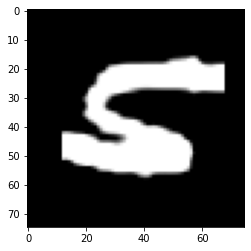

In [ ]:
plt.imshow(xtrain[25776]), ytrain[25776]

In [ ]:
net=InceptionResNetV2(input_shape=xtrain[0].shape, weights="imagenet", include_top=False)

219062272/219055592 [==============================] - 8s 0us/step


In [ ]:
len(net.layers)

780

In [ ]:
a=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
a[-4:]

[7, 8, 9, 10]

In [ ]:
a[:-4]

[1, 2, 3, 4, 5, 6]

In [ ]:
for layer in net.layers:
    layer.trainable = True

In [ ]:
x=Flatten()(net.output)

In [ ]:
x=Dropout(0.3)(x)

In [ ]:
x=Dense(128, activation="relu", kernel_initializer=glorot_uniform(seed=0), kernel_regularizer=l2(0.01))(x)

In [ ]:
x=Dense(10, activation="softmax", kernel_initializer=glorot_uniform(seed=0))(x)

In [ ]:
model=Model(inputs=net.input, outputs=x)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 75, 75, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 37, 37, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 37, 37, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 37, 37, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [ ]:
lr_scheduler=keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10,
    decay_rate=0.9
)

AttributeError: ignored

In [ ]:
epochs=30
learning_rate=0.01

In [ ]:
decay_rate=learning_rate/epochs

In [ ]:
adam=Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, decay=decay_rate)

In [ ]:
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=xtrain, y=ytrain, batch_size=32, epochs=epochs)

Epoch 1/30
34300/34300 [==============================] - 324s 9ms/step - loss: 1.2703 - accuracy: 0.7115
Epoch 2/30
34300/34300 [==============================] - 260s 8ms/step - loss: 0.2974 - accuracy: 0.9622
Epoch 3/30
34300/34300 [==============================] - 259s 8ms/step - loss: 0.4115 - accuracy: 0.9408
Epoch 4/30
34300/34300 [==============================] - 259s 8ms/step - loss: 0.3061 - accuracy: 0.9431
Epoch 5/30
34300/34300 [==============================] - 260s 8ms/step - loss: 0.1723 - accuracy: 0.9683
Epoch 6/30
34300/34300 [==============================] - 259s 8ms/step - loss: 0.1677 - accuracy: 0.9693
Epoch 7/30
34300/34300 [==============================] - 260s 8ms/step - loss: 0.0998 - accuracy: 0.9836
Epoch 8/30
34300/34300 [==============================] - 260s 8ms/step - loss: 0.1585 - accuracy: 0.9692
Epoch 9/30
34300/34300 [==============================] - 261s 8ms/step - loss: 0.0879 - accuracy: 0.9845
Epoch 10/30
34300/34300 [=====================

In [ ]:
preds = model.evaluate(eval_x, eval_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

14700/14700 [==============================] - 32s 2ms/step
Loss = 0.04109465224047502
Test Accuracy = 0.991972804069519


In [ ]:
model.save("/content/inception-resnet_v2.h5", include_optimizer=True)

In [ ]:
model=load_model("/content/drive/My Drive/MNIST/inception-resnet_v2.h5")

In [ ]:
model.fit(x=xtrain, y=ytrain, batch_size=32, epochs=30)

Epoch 1/30
34300/34300 [==============================] - 414s 12ms/step - loss: 0.0072 - accuracy: 0.9997
Epoch 2/30
34300/34300 [==============================] - 343s 10ms/step - loss: 0.0058 - accuracy: 0.9999
Epoch 3/30
34300/34300 [==============================] - 343s 10ms/step - loss: 0.0137 - accuracy: 0.9986
Epoch 4/30
34300/34300 [==============================] - 343s 10ms/step - loss: 0.0124 - accuracy: 0.9989
Epoch 5/30
34300/34300 [==============================] - 344s 10ms/step - loss: 0.0088 - accuracy: 0.9995
Epoch 6/30
34300/34300 [==============================] - 344s 10ms/step - loss: 0.0075 - accuracy: 0.9995
Epoch 7/30
34300/34300 [==============================] - 345s 10ms/step - loss: 0.0122 - accuracy: 0.9991
Epoch 8/30
34300/34300 [==============================] - 344s 10ms/step - loss: 0.0063 - accuracy: 0.9996
Epoch 9/30
34300/34300 [==============================] - 342s 10ms/step - loss: 0.0056 - accuracy: 0.9997
Epoch 10/30
34300/34300 [============

In [ ]:
preds = model.evaluate(eval_x, eval_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

14700/14700 [==============================] - 42s 3ms/step
Loss = 0.04348712315098668
Test Accuracy = 0.9929251670837402


In [ ]:
model.save("/content/drive/My Drive/MNIST/inception-resnet_v2.h5", include_optimizer=True)

In [ ]:
prob=model.predict(test_x)

In [ ]:
probs=np.zeros((prob.shape))
for i in range(prob.shape[0]):
    probs[i]=prob[i]>=max(prob[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


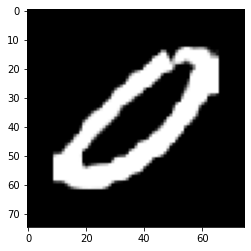

In [ ]:
plt.imshow(test_x[1])

In [ ]:
probs[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
p=[]
for j in range(probs.shape[0]):
    p.append([i for i in range(len(probs[j])) if probs[j][i]==1])

In [ ]:
pclass=np.array(p)

In [ ]:
pclass=pclass.reshape(pclass.shape[0],)
pclass.shape

(21000,)

In [ ]:
p=list(pclass)
len(p)

21000

In [ ]:
fname=list(test["filename"].values)

In [ ]:
l=list(zip(fname, p))

In [ ]:
submission=pd.DataFrame(data=l, columns=["filename", "label"])
submission.head()

,filename,label
0,49000.png,4
1,49001.png,0
2,49002.png,9
3,49003.png,7
4,49004.png,9


In [ ]:
submission.to_csv("/content/submission.csv")